In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [23]:
#loading the data
data=sns.load_dataset("mpg")
#data.info()
data.describe()
data.head()



mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino

In [19]:
#handling missing values
data.isnull().sum()
data.dropna(inplace=True)
data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB


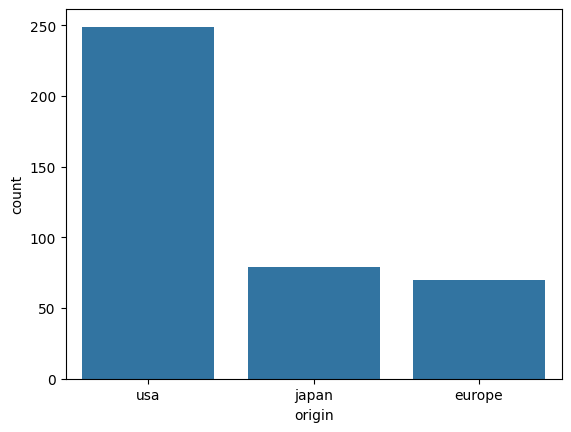

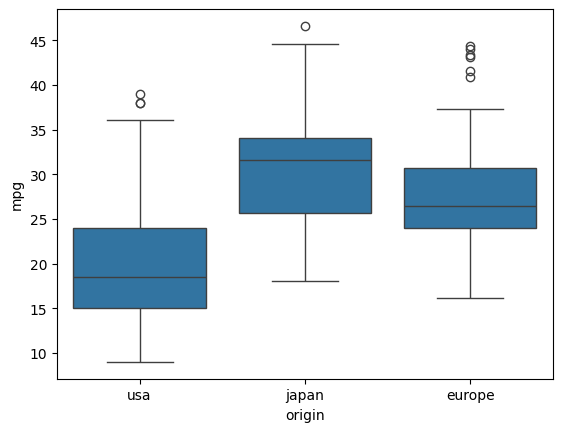

In [24]:
#plotting the data

sns.countplot(x='origin',data=data)
plt.show()

sns.boxplot(x='origin',y='mpg',data=data)
plt.show()

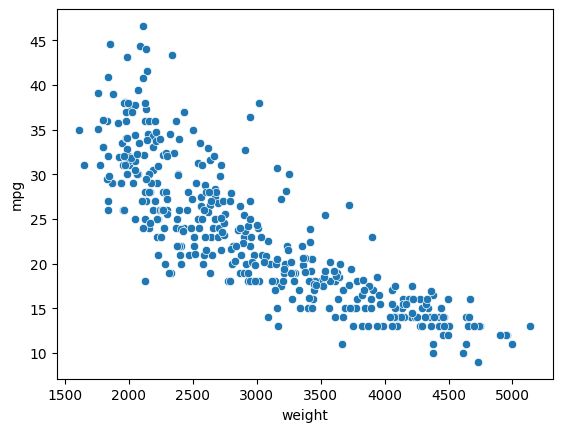

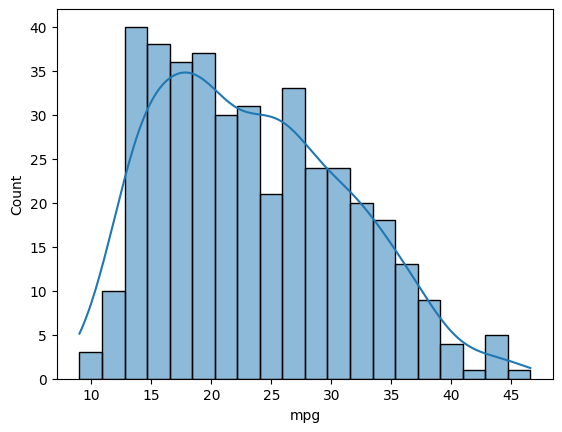

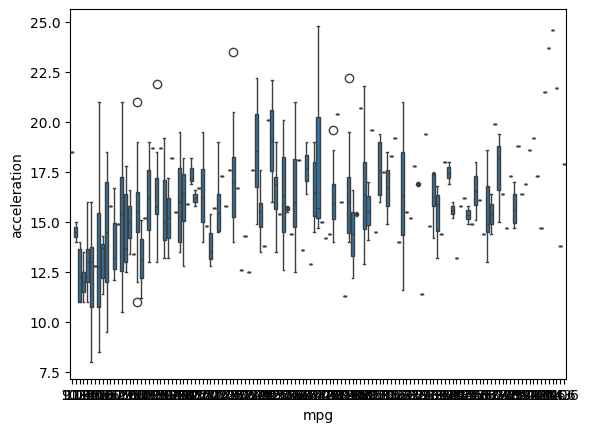

In [30]:
#bivariate analysis

#scatter plot
sns.scatterplot(x='weight',y='mpg',data=data)
plt.show()

#histogram
sns.histplot(data['mpg'],bins=20,kde=True)
plt.show()

#boxplot
sns.boxplot(x='mpg',y='acceleration',data=data)
plt.show()



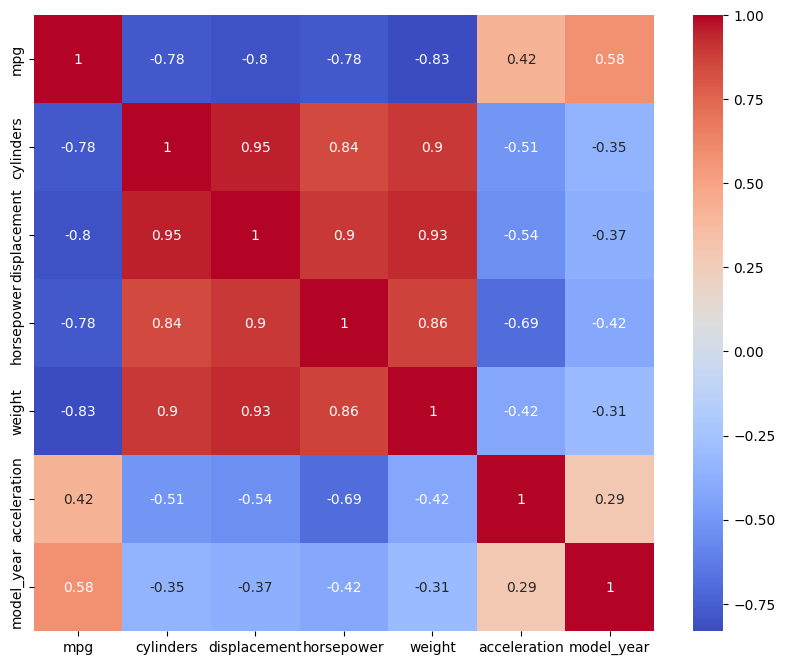

mpg             1.000000
model_year      0.579267
acceleration    0.420289
cylinders      -0.775396
horsepower     -0.778427
displacement   -0.804203
Name: mpg, dtype: float64


In [33]:
#correlation matrix
corr=data.corr(numeric_only=True)
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

#top 5 correlations
top_corr=corr['mpg'].sort_values(ascending=False).head(6)
print(top_corr)

In [ ]:
#outlier detection

df_clean=data.copy()
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
print(df_clean.shape)

(372, 9)
